In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 22.4 MB/s 
     |████████████████████████████████| 163 kB 55.5 MB/s 
     |████████████████████████████████| 7.6 MB 58.4 MB/s 


In [25]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from transformers import BertForSequenceClassification, AutoTokenizer, TextClassificationPipeline
import transformers
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [3]:
model = BertForSequenceClassification.from_pretrained('AidenH20/DNABERT-500down', id2label={0: 'negative', 1: 'positive'}).to('cuda')
model.eval()

tokenizer = AutoTokenizer.from_pretrained('AidenH20/DNABERT-500down')

Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/357M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [74]:
pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, top_k = 1, device=0)

X = pd.read_csv('XLTestingData.csv')['b3'].to_list()
y_pred = [out for out in pipe(X)]

In [78]:
y_true = pd.read_csv('XLTestingData.csv')['label'].to_list()

for idx, value in enumerate(y_true):
  if value == 1:
    y_true[idx] = [0, 1]
  elif value == 0:
    y_true[idx] = [1, 0]

y_true = np.array(y_true)

In [79]:
for idx, value in enumerate(y_pred):
  if value[0]['label'] == 'negative':
    y_pred[idx] = [value[0]['score'], 0]
  else:
    y_pred[idx] = [0, value[0]['score']]

TypeError: ignored

In [87]:
y_pred = np.array(y_pred)

indices = np.arange(y_true.shape[0])
np.random.shuffle(indices)

y_true = y_true[indices]
y_pred = y_pred[indices]

array([1, 0])

In [84]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


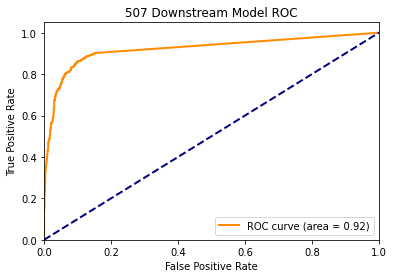

In [92]:
plt.figure()
lw = 2
plt.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("507 Downstream Model ROC")
plt.legend(loc="lower right")
plt.savefig(fname='507dsROC.png', dpi=800)

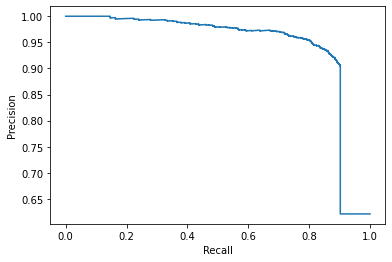

In [101]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec = dict()
recall = dict()
prc_auc = dict()

for i in range(2):
  prec[i], recall[i], _ = precision_recall_curve(y_true[: , i], y_pred[:, i])

  # prc_auc[i] = auc(prec[i], recall[i])

pr_display = PrecisionRecallDisplay(precision=prec[1], recall=recall[1]).plot()